In [121]:
# all imports
import numpy as np
import os
import requests
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs import WCS
import math
import matplotlib as mpl
from astropy.visualization.wcsaxes import SphericalCircle
import pandas as pd
import random

In [122]:
# define directories
data_dir = '/global/cfs/projectdirs/desi/science/td/pv/tfgalaxies/'
cache_dir = '/pscratch/sd/j/jjpim/cache/' # my cache path
vi_dir = '/pscratch/sd/j/jjpim/visual_inspection/' # vi image path

In [123]:
# load updated fuji table
tf_fuji = Table.read(data_dir + 'SV/desi_pv_tf_fuji_healpix_rotcurve_EOA_VI_velocity.fits') 
# load iron table
tf_iron = Table.read(data_dir + 'Y1/desi_pv_tf_iron_healpix_rotcurve_EOA_VI_velocity.fits')
#combine
tf_mastertable = vstack([tf_fuji,tf_iron])
#dictionary
tf_mastertable_dict = {}
for sga_id in np.unique(tf_mastertable['SGA_ID']):
    tf_mastertable_dict[sga_id] = np.where(tf_mastertable['SGA_ID'] == sga_id)[0]

In [124]:
#find sga id with the most targets
for sga_id in tf_galaxies:
    if len(tf_mastertable[tf_mastertable['SGA_ID']==  sga_id])>25:
        print(sga_id)

547778
608015
1065602
1333993


In [161]:
tf_mastertable[tf_mastertable['SGA_ID']==  1065602]

TARGETID,TARGET_RA,TARGET_DEC,HEALPIX,SURVEY,Z,ZERR,ZWARN,DELTACHI2,FILENAME,PVTYPE,SGA_ID,RA,DEC,OBS_IN_SV,SKY_FIBER_DIST,SKY_FIBER_DIST_R26,ROT_CURVE,EOA,VELOCITY,VERR
int64,float64,float64,int64,bytes4,float64,float64,int64,float64,bytes65,bytes3,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1083283966263312,180.088777358876,-1.11024777720183,25599,sv3,0.00436762087876588,1.42837672240012e-06,0,15897.7449971626,fuji/healpix/sv3/dark/255/25599/redrock-sv3-dark-25599.fits,EXT,1065602,180.08877735887648,-1.1102477772018335,1.0,0.013957389713373361,0.32999998593202395,1.0,1.0,-143.23592541861404,0.7111210610669596
1083283966263313,180.108167612631,-1.09016316641461,25599,sv3,0.0053534602140923,4.45334000484803e-06,0,4136.92135445221,fuji/healpix/sv3/dark/255/25599/redrock-sv3-dark-25599.fits,EXT,1065602,180.10816761263058,-1.090163166414607,1.0,0.013957389713391206,0.3299999859324459,1.0,1.0,152.3112721119796,1.4507778336944546
1070089826729999,180.078788337759,-1.1205943454118,25599,sv3,0.746080375788651,7.05932471404864e-05,0,12.3854653686285,fuji/healpix/sv3/bright/255/25599/redrock-sv3-bright-25599.fits,EXT,1065602,180.07878833775885,-1.1205943454118001,1.0,0.02833773063017716,0.6699999714376246,1.0,1.0,222216.65399896743,21.17093685826563
1083283966263311,180.078788337759,-1.1205943454118,25599,sv3,0.00464639799063975,3.19435285822499e-05,0,31.9120003114913,fuji/healpix/sv3/dark/255/25599/redrock-sv3-dark-25599.fits,EXT,1065602,180.07878833775885,-1.1205943454118001,1.0,0.02833773063017716,0.6699999714376246,1.0,1.0,-59.66064981580571,9.593243204719073
1083283966263314,180.118156429974,-1.07981649987604,25599,sv3,0.00535718577838891,1.59550379891168e-05,0,249.207345602888,fuji/healpix/sv3/dark/255/25599/redrock-sv3-dark-25599.fits,EXT,1065602,180.11815642997368,-1.0798164998760402,1.0,0.02833773063019543,0.6699999714380566,1.0,1.0,153.4281681898973,4.8167755305729365
1070083786932227,180.069093043901,-1.13063657023067,25599,sv3,0.508852243075155,0.000176351857769613,4,0.803055022843182,fuji/healpix/sv3/bright/255/25599/redrock-sv3-bright-25599.fits,TFT,1065602,180.06909304390072,-1.1306365702306744,1.0,0.04229512034355193,0.9999999573696817,1.0,1.0,151097.44898603825,52.87200515270792
1083277926465539,180.069093043901,-1.13063657023067,25599,sv3,0.609555769981184,9.6756850868172e-05,4,4.17820824682713,fuji/healpix/sv3/dark/255/25599/redrock-sv3-dark-25599.fits,TFT,1065602,180.06909304390072,-1.1306365702306744,1.0,0.04229512034355193,0.9999999573696817,1.0,1.0,181287.60684646582,29.012529587731237
1070089826730003,180.127851393537,-1.06977411567805,25599,sv3,1.37914220539999,8.90974056076415e-05,4,3.03583170473576,fuji/healpix/sv3/bright/255/25599/redrock-sv3-bright-25599.fits,TFT,1065602,180.12785139353724,-1.0697741156780503,1.0,0.042295120343574265,0.9999999573702099,1.0,1.0,412003.8159641279,26.716763147425432
1083283966263315,180.127851393537,-1.06977411567805,25599,sv3,0.41132741165799,6.08823852491685e-05,4,3.33358387649059,fuji/healpix/sv3/dark/255/25599/redrock-sv3-dark-25599.fits,TFT,1065602,180.12785139353724,-1.0697741156780503,1.0,0.042295120343574265,0.9999999573702099,1.0,1.0,121860.24005945072,18.260907568913474


AttributeError: 'Column' object has no attribute 'iloc'

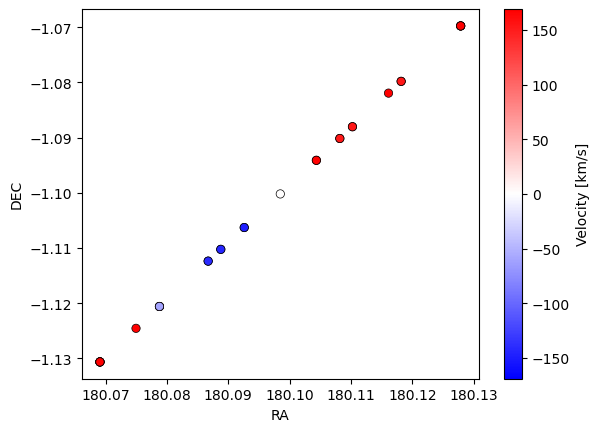

In [171]:
#define plotting variables
galaxy = tf_mastertable[tf_mastertable['SGA_ID'] == 1065602]
x = galaxy['RA']
y = galaxy['DEC']
c = galaxy['VELOCITY']

#velocity cut 
velocity_cut = c[c < 1000]

if len(velocity_cut) > 0:
    # find max of absolute value of the leftover velocities
    velocity_abs = np.abs(velocity_cut)
    v_max = np.max(velocity_abs)
    
    # define color bar min/max
    vmin = -v_max
    vmax = v_max
    

    # plot!!!
    plt.scatter(x, y, c=c, cmap='bwr', linewidths=0.5, edgecolors='black', vmin=vmin, vmax=vmax)
    plt.colorbar(label='Velocity [km/s]')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('SGA ID {} Velocity Map'.format(galaxy['SGA_ID'][0]))
    plt.show()
else:
    print(galaxy['TARGETID'])

In [141]:
print(velocity_abs)

     VELOCITY     
------------------
 81.23131963612231
134.26566784550334
1352.4197239565208
 81.23131963612231
0.8195361185068979
134.26566784550334
1352.4197239565208
 156.8537839869129
 2.003661701254118
  1.18412558274696
